### Time Series Decomposition

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

#### Read Air Passengers Datasets

In [2]:
import pandas as pd
df = pd.read_csv("AirPassengers.csv")
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [4]:
df.columns = ['Month' ,'npass']
df.head()

,Month,npass
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


#### Convert month column to date time

In [5]:
df['Month'] = pd.to_datetime(df['Month'])
df.head()

,Month,npass
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [6]:
df.dtypes

Month    datetime64[ns]
npass             int64
dtype: object

In [7]:
df.index = df['Month']
df.head()

,Month,npass
Month,,
1949-01-01,1949-01-01,112
1949-02-01,1949-02-01,118
1949-03-01,1949-03-01,132
1949-04-01,1949-04-01,129
1949-05-01,1949-05-01,121


#### Drop month column

In [8]:
df = df.drop(columns=['Month'])
df.head()

,npass
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


#### Visualise The time series data

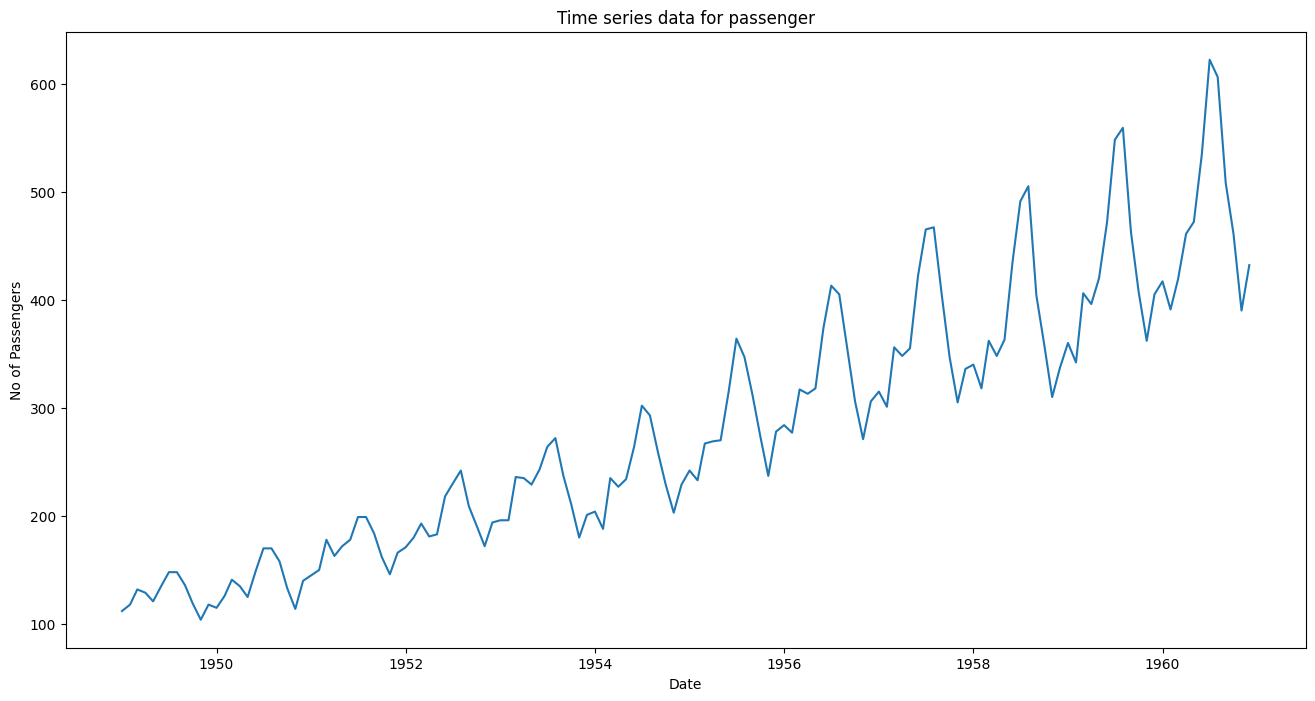

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(df['npass'])
plt.title("Time series data for passenger")
plt.xlabel('Date')
plt.ylabel('No of Passengers')
plt.show()

#### Time series Decomposition

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [11]:
T = seasonal_decompose(df['npass'],model='multiplicative')

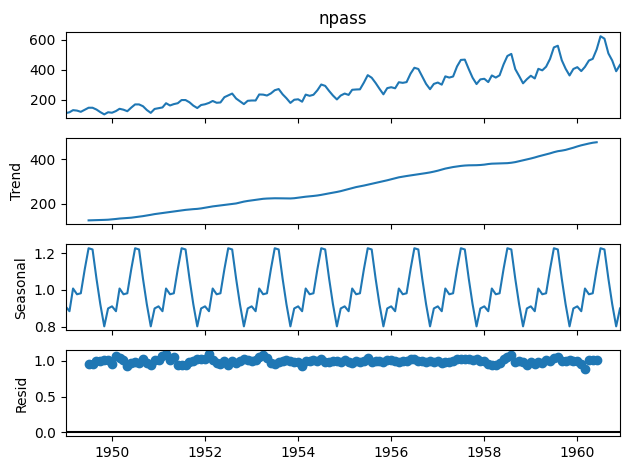

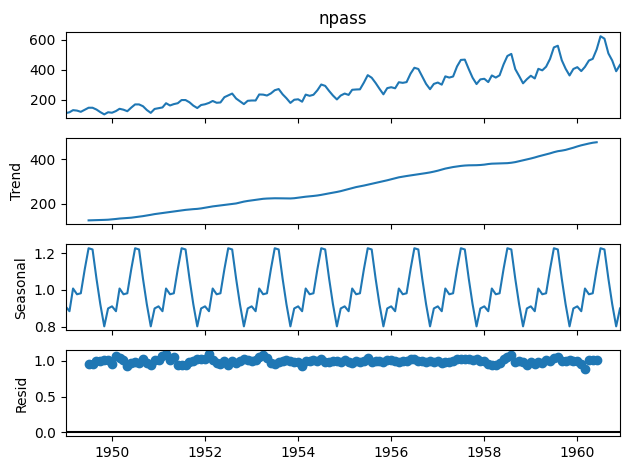

In [12]:
T.plot()

<Axes: xlabel='Month'>

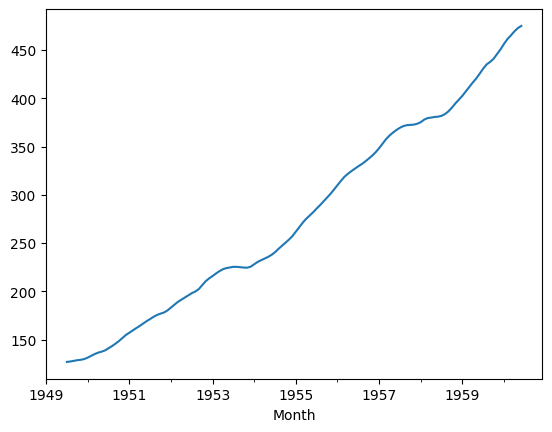

In [13]:
T.trend.plot()

<Axes: xlabel='Month'>

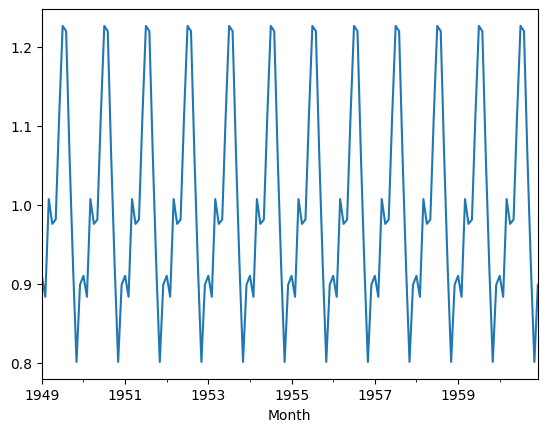

In [14]:
T.seasonal.plot()

<Axes: xlabel='Month'>

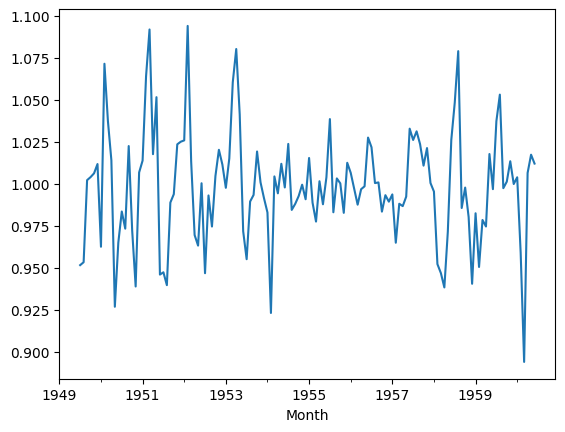

In [15]:
T.resid.plot()

#### Time series Forcasting

##### Install pmdarima Library

In [16]:
%pip install pmdarima

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


##### Restart and run all

In [17]:
from pmdarima import auto_arima

In [18]:
model = auto_arima(df['npass'] , seasonal = True , m =12)

In [19]:
model.order

(2, 1, 1)

model selected ARIMA is (p=2 , d=1 , q=1)

In [20]:
forcast , coef_interval = model.predict(n_periods=36 , return_conf_int = True)

In [21]:
forcast

1961-01-01    445.634991
1961-02-01    420.395103
1961-03-01    449.198451
1961-04-01    491.840095
1961-05-01    503.394633
1961-06-01    566.862610
1961-07-01    654.260334
1961-08-01    638.597642
1961-09-01    540.883890
1961-10-01    494.126763
1961-11-01    423.332843
1961-12-01    465.507703
1962-01-01    479.291063
1962-02-01    454.177067
1962-03-01    483.087234
1962-04-01    525.819514
1962-05-01    537.450958
1962-06-01    600.984190
1962-07-01    688.437283
1962-08-01    672.821572
1962-09-01    575.147683
1962-10-01    528.424380
1962-11-01    457.659160
1962-12-01    499.858372
1963-01-01    513.662395
1963-02-01    488.565931
1963-03-01    517.490975
1963-04-01    560.235877
1963-05-01    571.878032
1963-06-01    635.420351
1963-07-01    722.881156
1963-08-01    707.271987
1963-09-01    609.603650
1963-10-01    562.885057
1963-11-01    492.123834
1963-12-01    534.326437
Freq: MS, dtype: float64

In [22]:
forcast = forcast.apply(round)
forcast

1961-01-01    446
1961-02-01    420
1961-03-01    449
1961-04-01    492
1961-05-01    503
1961-06-01    567
1961-07-01    654
1961-08-01    639
1961-09-01    541
1961-10-01    494
1961-11-01    423
1961-12-01    466
1962-01-01    479
1962-02-01    454
1962-03-01    483
1962-04-01    526
1962-05-01    537
1962-06-01    601
1962-07-01    688
1962-08-01    673
1962-09-01    575
1962-10-01    528
1962-11-01    458
1962-12-01    500
1963-01-01    514
1963-02-01    489
1963-03-01    517
1963-04-01    560
1963-05-01    572
1963-06-01    635
1963-07-01    723
1963-08-01    707
1963-09-01    610
1963-10-01    563
1963-11-01    492
1963-12-01    534
Freq: MS, dtype: int64

In [23]:
coef_interval

array([[423.34487759, 467.92510471],
       [394.23551428, 446.55469252],
       [419.83188992, 478.56501199],
       [460.37649263, 523.3036964 ],
       [470.38073086, 536.40853522],
       [532.6996341 , 601.02558583],
       [619.22147403, 689.2991947 ],
       [602.88020044, 674.31508414],
       [504.63159492, 577.13618588],
       [457.44624137, 530.80728383],
       [386.30414338, 460.361543  ],
       [428.19161369, 502.82379164],
       [433.49782381, 525.08430198],
       [405.10923684, 503.2448968 ],
       [431.15603588, 535.01843199],
       [471.84098531, 579.79804326],
       [481.87404375, 593.02787316],
       [544.15707729, 657.81130293],
       [630.60926527, 746.26530151],
       [614.17967749, 731.46346653],
       [515.83290928, 634.46245755],
       [468.5446067 , 588.30415285],
       [397.29775817, 518.02056239],
       [439.08041924, 560.63632426],
       [446.32772851, 580.99706096],
       [418.31885906, 558.81300308],
       [444.62493726, 590.35701177],
 

In [24]:
lower =  coef_interval[:,0]
upper = coef_interval[0:,1]

In [25]:
lower

array([423.34487759, 394.23551428, 419.83188992, 460.37649263,
       470.38073086, 532.6996341 , 619.22147403, 602.88020044,
       504.63159492, 457.44624137, 386.30414338, 428.19161369,
       433.49782381, 405.10923684, 431.15603588, 471.84098531,
       481.87404375, 544.15707729, 630.60926527, 614.17967749,
       515.83290928, 468.5446067 , 397.29775817, 439.08041924,
       446.32772851, 418.31885906, 444.62493726, 485.40258719,
       495.45124969, 557.69975588, 644.08749446, 627.57500073,
       529.13421157, 481.7453998 , 410.39451382, 452.0714933 ])

In [26]:
upper

array([467.92510471, 446.55469252, 478.56501199, 523.3036964 ,
       536.40853522, 601.02558583, 689.2991947 , 674.31508414,
       577.13618588, 530.80728383, 460.361543  , 502.82379164,
       525.08430198, 503.2448968 , 535.01843199, 579.79804326,
       593.02787316, 657.81130293, 746.26530151, 731.46346653,
       634.46245755, 588.30415285, 518.02056239, 560.63632426,
       580.99706096, 558.81300308, 590.35701177, 635.06916778,
       648.30481429, 713.14094693, 801.6748169 , 786.9689735 ,
       690.07308868, 644.02471427, 573.8531551 , 616.58138136])

#### Plot the forcast along with other data

AttributeError: PolyCollection.set() got an unexpected keyword argument 'colour'

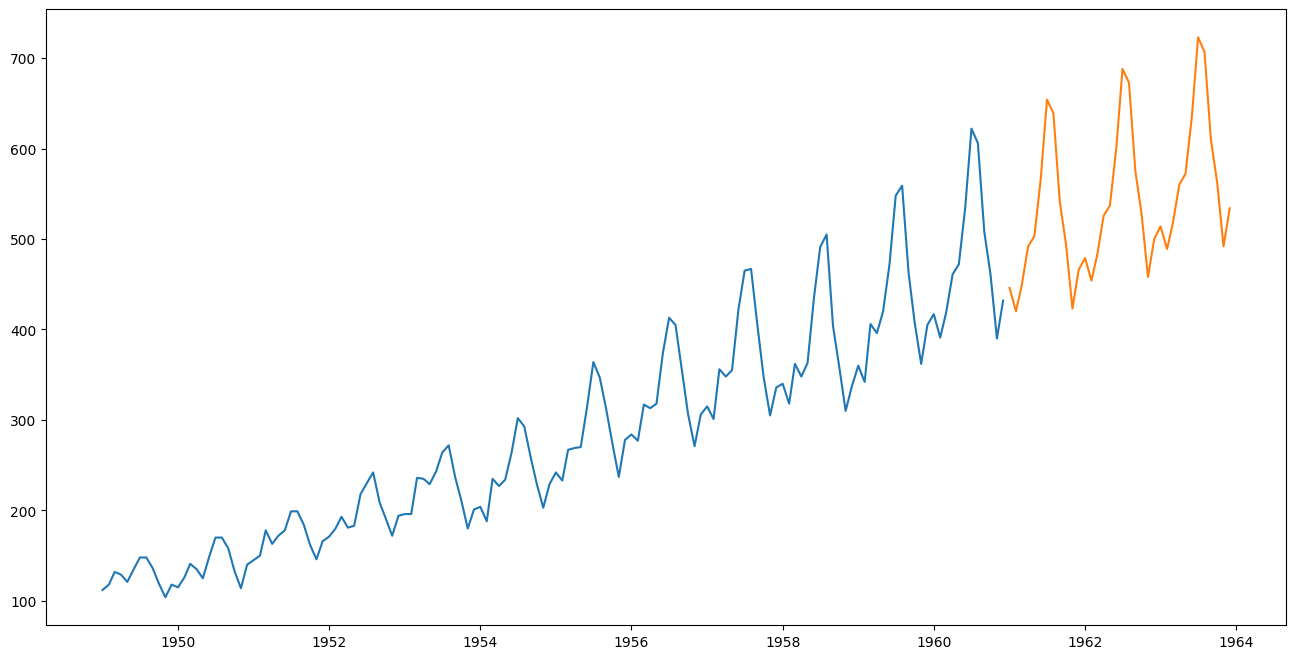

In [27]:
plt.figure(figsize = (16,8))
plt.plot(df['npass'],label ='original')
plt.plot(forcast , label = 'forcast')
plt.fill_between(forcast.index , lower , upper ,alpha = 0.7 , colour = 'grey' , label = 'confidence interval')
plt.show()

#### Save forcasted Data into Dataframe

In [28]:
df_pred = forcast.to_frame()
df_pred

,0
1961-01-01,446
1961-02-01,420
1961-03-01,449
1961-04-01,492
1961-05-01,503
1961-06-01,567
1961-07-01,654
1961-08-01,639
1961-09-01,541
1961-10-01,494


In [29]:
df_pred['lower'] = lower
df_pred['upper'] = upper

In [30]:
df_pred

,0,lower,upper
1961-01-01,446,423.344878,467.925105
1961-02-01,420,394.235514,446.554693
1961-03-01,449,419.831890,478.565012
1961-04-01,492,460.376493,523.303696
1961-05-01,503,470.380731,536.408535
1961-06-01,567,532.699634,601.025586
1961-07-01,654,619.221474,689.299195
1961-08-01,639,602.880200,674.315084
1961-09-01,541,504.631595,577.136186
1961-10-01,494,457.446241,530.807284


In [31]:
df_pred['lower']= df_pred['lower'].apply(round)
df_pred['upper']= df_pred['upper'].apply(round)

#### Save predictions to CSV

In [32]:
df_pred.to_csv('Predictions.csv')